In [1]:
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#load csv
file_path = ('/content/houston-aqi-2010-2021.csv')
df = pd.read_csv (file_path)

#printing the csv file will help us to check the column names
print (df.head())

   Unnamed: 0  day_of_year  year   latitude  longitude  avg_pm10  aqi_pm10  \
0           0            2  2010  29.733726 -95.257593        13        12   
1           1            2  2010  29.733726 -95.257593        13        12   
2           2            2  2010  29.733726 -95.257593        13        12   
3           3            2  2010  29.733726 -95.257593        13        12   
4           4            2  2010  29.733726 -95.257593        13        12   

     avg_co  aqi_co    avg_no2  ...    avg_o3  aqi_o3  avg_pm25  aqi_pm25  \
0  0.297667     NaN  17.258333  ...  0.027294      32      11.6        48   
1  0.297667     NaN  17.258333  ...  0.027294      32      11.6        48   
2  0.297667     NaN  17.258333  ...  0.027294      32       9.7        40   
3  0.297667     NaN  17.258333  ...  0.027294      32       9.7        40   
4  0.325000     6.0  17.258333  ...  0.027294      32      11.6        48   

    avg_so2  aqi_so2  avg_humidity  avg_temperature  avg_wind  avg_p

Fail to reject the null hypothesis: The standard deviations are equal.
Sample Mean: 1018.87125
Sample Standard Deviation: 5.794011605902931
Confidence Interval for Standard Deviation: (47.2882667216256, 70.28141881386763)


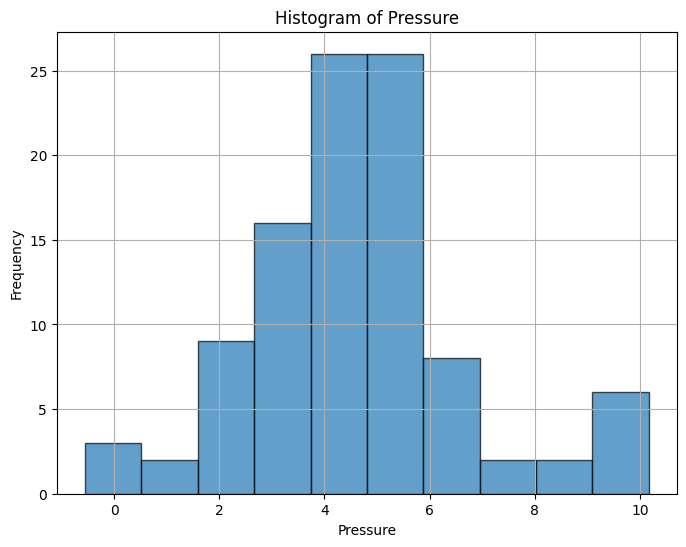

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import f

# Load the data
file_path = ('/content/houston-aqi-2010-2021.csv')
data = pd.read_csv(file_path)

# Randomly select 100 samples from the 'pressure' column
random_indices = np.random.choice(df.index, 100, replace=False)
sample_size = 100
selected_samples_pressure = data.loc[random_indices, 'avg_pressure']

#Descriptive statistics
sample_mean = np.mean(selected_samples_pressure)
sample_std = np.std(selected_samples_pressure, ddof=1)

# Calculate sample standard deviation
sample_std = np.std(selected_samples_pressure, ddof=1)

# Perform hypothesis test for standard deviations
# Null hypothesis (H0): The standard deviations are equal
# Alternative hypothesis (H1): The standard deviations are not equal

# Select another random sample for comparison
comparison_sample = data['avg_pressure'].sample(sample_size)

# Calculate the standard deviation of the comparison sample
comparison_std = np.std(comparison_sample, ddof=1)

# Calculate the F-statistic for the two samples
F_statistic = (sample_std ** 2) / (comparison_std ** 2)

# Calculate the critical F-value for a 95% confidence level
alpha = 0.05
df_num = sample_size - 1
df_den = sample_size - 1
critical_F_value = f.ppf(1 - alpha / 2, df_num, df_den)

# Compare the F-statistic with the critical F-value
if F_statistic > critical_F_value or F_statistic < 1 / critical_F_value:
    print("Reject the null hypothesis: The standard deviations are not equal.")
else:
    print("Fail to reject the null hypothesis: The standard deviations are equal.")

# Construct confidence interval for standard deviation
confidence_level = 0.95
alpha_CI = 1 - confidence_level
lower_bound = np.sqrt((sample_size - 1) * sample_std ** 2 / f.ppf(1 - alpha_CI / 2, df_num, df_den))
upper_bound = np.sqrt((sample_size - 1) * sample_std ** 2 / f.ppf(alpha_CI / 2, df_num, df_den))

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Confidence Interval for Standard Deviation: ({lower_bound}, {upper_bound})")

# Sample data
data = np.random.normal(loc=5, scale=2, size=100)

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Histogram of Pressure')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_ind

# Load the data
file_path = ('/content/houston-aqi-2010-2021.csv')
data = pd.read_csv(file_path)

# Set seed for reproducibility
np.random.seed(42)

# Function to perform hypothesis test and calculate CI for mean and SD
def hypothesis_test_and_ci(sample1, sample2, variable_name1, variable_name2):
    # Calculate mean and standard deviation of the samples
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)

    # Hypothesis: H0 - The means or standard deviations are equal
    #             H1 - The means or standard deviations are not equal
    # Perform a hypothesis test for the mean
    t_statistic_mean, p_value_mean = ttest_ind(sample1, sample2)

    # Perform a hypothesis test for the standard deviation
    t_statistic_std = (std1 - std2) / np.sqrt((std1**2 / len(sample1)) + (std2**2 / len(sample2)))
    degrees_of_freedom_std = len(sample1) + len(sample2) - 2
    p_value_std = 2 * (1 - t.cdf(np.abs(t_statistic_std), df=degrees_of_freedom_std))

    # Calculate the confidence interval for the mean difference
    diff_mean = mean1 - mean2
    std_error_mean_diff = np.sqrt((std1**2 / len(sample1)) + (std2**2 / len(sample2)))
    margin_of_error_mean_diff = t.ppf(1 - alpha / 2, df=degrees_of_freedom_std) * std_error_mean_diff
    ci_mean_diff = (diff_mean - margin_of_error_mean_diff, diff_mean + margin_of_error_mean_diff)

    # Calculate the confidence interval for the standard deviation difference
    diff_std = std1 - std2
    margin_of_error_std_diff = t.ppf(1 - alpha / 2, df=degrees_of_freedom_std) * np.sqrt(
        ((len(sample1) - 1) * std1**2 + (len(sample2) - 1) * std2**2) / degrees_of_freedom_std
    )
    ci_std_diff = (diff_std - margin_of_error_std_diff, diff_std + margin_of_error_std_diff)

    # Print results
    print(f"\nComparison between {variable_name1} and {variable_name2}:")
    print(f"{variable_name1} Mean: {mean1}")
    print(f"{variable_name2} Mean: {mean2}")
    print(f"T-Statistic for Mean: {t_statistic_mean}")
    print(f"P-Value for Mean: {p_value_mean}")
    print(f"Confidence Interval for Mean Difference: {ci_mean_diff}")

    print(f"\n{variable_name1} Standard Deviation: {std1}")
    print(f"{variable_name2} Standard Deviation: {std2}")
    print(f"T-Statistic for Standard Deviation: {t_statistic_std}")
    print(f"P-Value for Standard Deviation: {p_value_std}")
    print(f"Confidence Interval for Standard Deviation Difference: {ci_std_diff}")

    # Interpret the results
    if p_value_mean < alpha:
        print(f"\nReject the null hypothesis for mean. There is enough evidence to suggest that the means are different.")
    else:
        print(f"\nFail to reject the null hypothesis for mean. There is not enough evidence to suggest that the means are different.")

    if p_value_std < alpha:
        print(f"Reject the null hypothesis for standard deviation. There is enough evidence to suggest that the standard deviations are different.")
    else:
        print(f"Fail to reject the null hypothesis for standard deviation. There is not enough evidence to suggest that the standard deviations are different.")

# Randomly select 100 samples from 'wind' and 'temperature'
random_indices = np.random.choice(df.index, 100, replace=False)
selected_samples_wind = data.loc[random_indices, 'avg_wind']
selected_samples_temperature = data.loc[random_indices, 'avg_temperature']

# Perform hypothesis test and calculate CI for (wind, temperature)
hypothesis_test_and_ci(selected_samples_wind, selected_samples_temperature, 'Wind', 'Temperature')

# Repeat the process for other variable pairs: (wind, humidity), (temperature, humidity), (humidity, pressure), and (humidity, wind)
random_indices = np.random.choice(df.index, 100, replace=False)
selected_samples_humidity = data.loc[random_indices, 'avg_humidity']
selected_samples_pressure = data.loc[random_indices, 'avg_pressure']

# Perform hypothesis test and calculate CI for (wind, humidity)
hypothesis_test_and_ci(selected_samples_wind, selected_samples_humidity, 'Wind', 'Humidity')

# Perform hypothesis test and calculate CI for (temperature, humidity)
hypothesis_test_and_ci(selected_samples_temperature, selected_samples_humidity, 'Temperature', 'Humidity')

# Perform hypothesis test and calculate CI for (humidity, pressure)
hypothesis_test_and_ci(selected_samples_humidity, selected_samples_pressure, 'Humidity', 'Pressure')

# Perform hypothesis test and calculate CI for (humidity, wind)
hypothesis_test_and_ci(selected_samples_humidity, selected_samples_wind, 'Humidity', 'Wind')



Comparison between Wind and Temperature:
Wind Mean: 5.6440719700000015
Temperature Mean: 68.46750541
T-Statistic for Mean: -42.98921552638998
P-Value for Mean: 2.3099236061743957e-102
Confidence Interval for Mean Difference: (-65.70529362852012, -59.94157325147988)

Wind Standard Deviation: 2.4064715885340355
Temperature Standard Deviation: 14.414265501742232
T-Statistic for Standard Deviation: -8.216769002674567
P-Value for Standard Deviation: 2.6867397195928788e-14
Confidence Interval for Standard Deviation Difference: (-32.38562273054941, 8.370034904133014)

Reject the null hypothesis for mean. There is enough evidence to suggest that the means are different.
Reject the null hypothesis for standard deviation. There is enough evidence to suggest that the standard deviations are different.

Comparison between Wind and Humidity:
Wind Mean: 5.6440719700000015
Humidity Mean: 63.819488530000015
T-Statistic for Mean: -41.55191996518336
P-Value for Mean: 9.939836091185943e-100
Confidence I